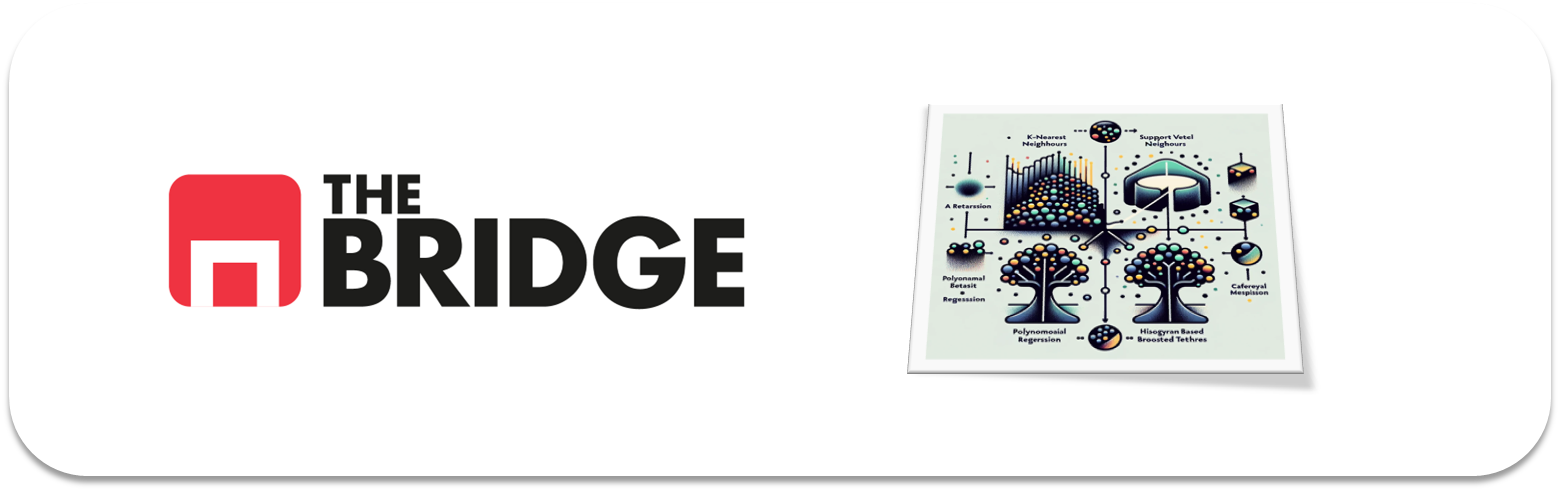

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR

seed = 22

In [2]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')
df.columns = df.columns.str.replace(" ", "_").str.lower()

# Mostrar primeras filas
display(df.head())

# Información general del dataset
df.info()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


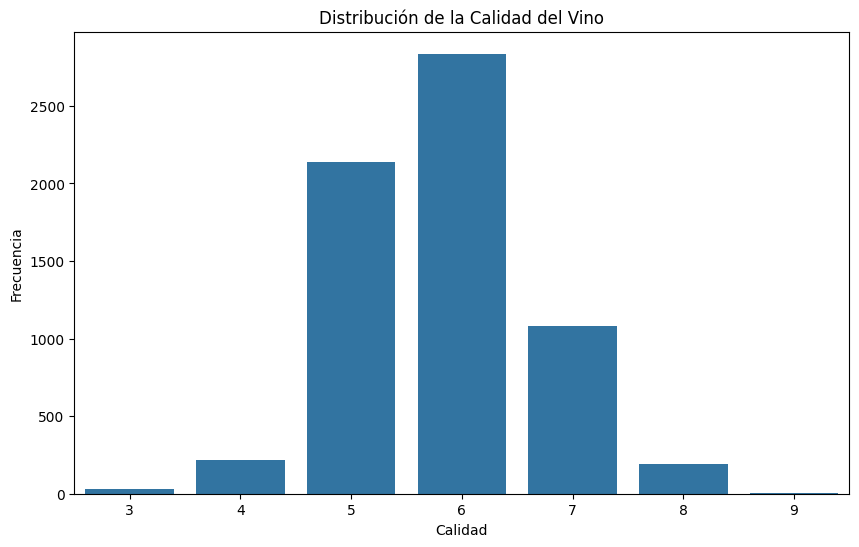

In [3]:
# Variable target de clasificación
target_classification = 'quality'

print(df[target_classification].value_counts(normalize=True), end="\n\n")
print(df[target_classification].describe())

plt.figure(figsize=(10, 6))
sns.countplot(x=target_classification, data=df)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


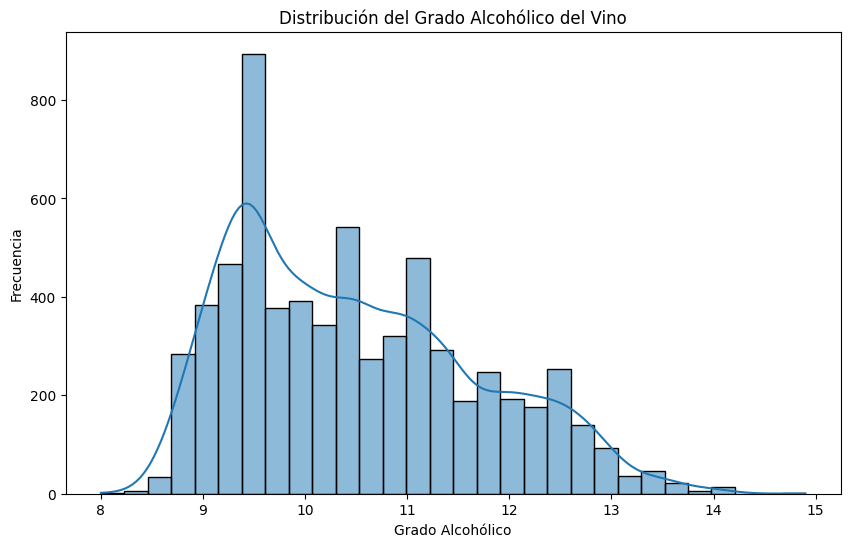

In [4]:
# Variable target de regresión
target_regression = 'alcohol'
print(df[target_regression].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df[target_regression], bins=30, kde=True)
plt.title('Distribución del Grado Alcohólico del Vino')
plt.xlabel('Grado Alcohólico')
plt.ylabel('Frecuencia')
plt.show()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [5]:
# Características y target
X = df.drop(columns=[target_classification, target_regression, 'class'])
y = df[target_classification]

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
k_values = [3, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=4, scoring='recall_macro')
    print(f'KNN (k={k}) - Recall medio (cross-validation): {scores.mean():.4f}')

KNN (k=3) - Recall medio (cross-validation): 0.2606
KNN (k=5) - Recall medio (cross-validation): 0.2390


In [7]:
# Lista de modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=seed),
    'SVM': SVC(random_state=seed),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=seed)
}

# Evaluación con validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=4, scoring='recall_macro')
    print(f'{name} - Recall medio (cross-validation): {scores.mean():.4f}')

RandomForest - Recall medio (cross-validation): 0.3197
SVM - Recall medio (cross-validation): 0.2305
LogisticRegression - Recall medio (cross-validation): 0.2215


In [8]:
# Definimos la grilla de parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search con validación cruzada
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=seed), param_grid_rf, cv=4, scoring='recall_macro', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

print(f'Mejores parámetros para Random Forest: {grid_search_rf.best_params_}')
print(f'Recall medio (cross-validation) para Random Forest optimizado: {grid_search_rf.best_score_:.4f}')

Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Recall medio (cross-validation) para Random Forest optimizado: 0.3208


c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_f

Distribución de clases después del resampling:
quality
6    2269
7    2269
5    2269
4    2269
8    2269
3    2269
9    2269
Name: count, dtype: int64
Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Recall medio (cross-validation) para Random Forest optimizado: 0.8981
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.31      0.37      0.34        43
           5       0.74      0.78      0.76       428
           6       0.74      0.67      0.70       567
           7       0.62      0.63      0.63       216
           8       0.44      0.62      0.51        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.40      0.44      0.42      1300
weighted avg       0.69      0.68      0.68      1300



c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

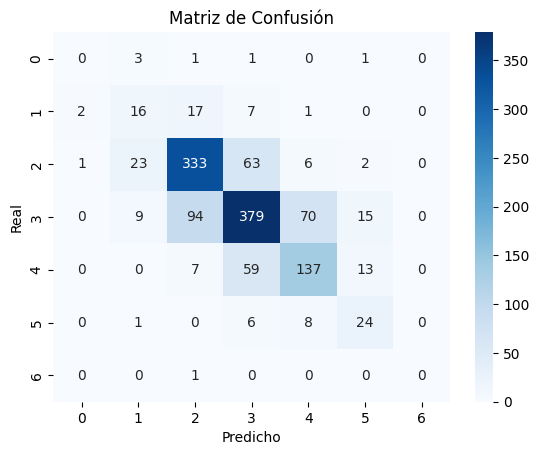

In [9]:
# Ajustamos k_neighbors para evitar el error
smote = SMOTE(random_state=seed, k_neighbors=3)  # Reducimos el número de vecinos
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Ver la distribución de clases después del resampling
print("Distribución de clases después del resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Reentrenamos el modelo con datos balanceados
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Mejores parámetros encontrados
print(f'Mejores parámetros para Random Forest: {grid_search_rf.best_params_}')
print(f'Recall medio (cross-validation) para Random Forest optimizado: {grid_search_rf.best_score_:.4f}')

# Evaluamos en el conjunto de prueba
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [10]:
# Ver la distribución de clases antes del resampling
print("Distribución de clases antes del resampling:")
print(y_train.value_counts())

# Ajustamos k_neighbors para evitar el error
smote = SMOTE(random_state=seed, k_neighbors=3)  # Reducimos el número de vecinos
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Ver la distribución de clases después del resampling
print("Distribución de clases después del resampling:")
print(pd.Series(y_train_resampled).value_counts())

Distribución de clases antes del resampling:
quality
6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: count, dtype: int64
Distribución de clases después del resampling:
quality
6    2269
7    2269
5    2269
4    2269
8    2269
3    2269
9    2269
Name: count, dtype: int64


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [11]:
# Características y target
X = df.drop(columns=[target_regression])
y = df[target_regression]

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificamos columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Definimos los transformadores para cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Aplicamos el preprocesador
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [12]:
# Modelo baseline
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
print(f'Linear Regression - MAPE medio (cross-validation): {-scores.mean():.4f}')

Linear Regression - MAPE medio (cross-validation): 0.0337


In [13]:
# Lista de modelos
models = {
    'RandomForest': RandomForestRegressor(random_state=seed),
    'GradientBoosting': GradientBoostingRegressor(random_state=seed),
    'SVR': SVR()
}

# Evaluación con validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    print(f'{name} - MAPE medio (cross-validation): {-scores.mean():.4f}')

RandomForest - MAPE medio (cross-validation): 0.0268
GradientBoosting - MAPE medio (cross-validation): 0.0348
SVR - MAPE medio (cross-validation): 0.0276


In [14]:
# Definimos la grilla de parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search con validación cruzada
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search_rf.fit(X_train_preprocessed, y_train)

print(f'Mejores parámetros para Random Forest: {grid_search_rf.best_params_}')
print(f'MAPE medio (cross-validation) para Random Forest optimizado: {-grid_search_rf.best_score_:.4f}')

Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAPE medio (cross-validation) para Random Forest optimizado: 0.0267


MAPE en el conjunto de prueba: 0.0248
R^2 en el conjunto de prueba: 0.8862


Text(0, 0.5, 'Valores Predichos')

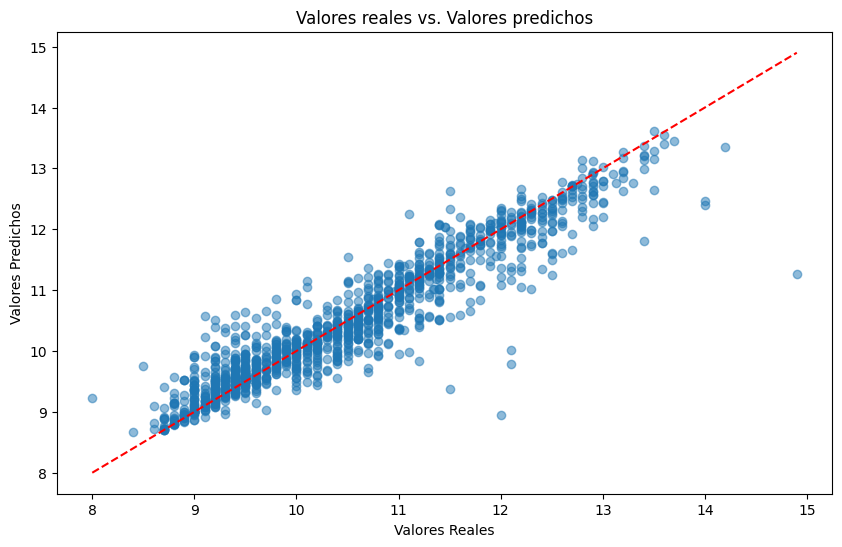

In [15]:
# Mejor modelo encontrado
best_rf = grid_search_rf.best_estimator_

# Predicción en el conjunto de prueba
y_pred = best_rf.predict(X_test_preprocessed)

# Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE en el conjunto de prueba: {mape:.4f}')
print(f'R^2 en el conjunto de prueba: {r2:.4f}')

# Visualización de errores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores reales vs. Valores predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')